### useful stats 

number of ids/participants = 27  
average time span = 78 days  
average mood measurements = 208  
mood meaurements per day = 2.6   
average time between mood measurements =   


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read data - change you to where you have dataset_mood_smartphone saved

In [4]:
parse_dates = ['time']
df = pd.read_csv("../dataset_mood_smartphone.csv") #,parse_dates=parse_dates)
df = df[['id','time','variable','value']]

In [5]:
# splitting time into date and hour
df[['date', 'hour']] = df['time'].str.split(' ', 1, expand=True)
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df['hour'] =  pd.to_datetime(df['hour'], format='%H:%M:%S.%f').dt.hour

In [6]:
df.dtypes

id                  object
time                object
variable            object
value              float64
date        datetime64[ns]
hour                 int64
dtype: object

In [7]:
df.isna().sum()

id            0
time          0
variable      0
value       202
date          0
hour          0
dtype: int64

In [8]:
df = df[df['value'].notna()]

In [9]:
neg = df[df['value']<0]

In [10]:
neg.variable.value_counts()

circumplex.arousal      2133
circumplex.valence       320
appCat.builtin             3
appCat.entertainment       1
Name: variable, dtype: int64

In [11]:
variables_that_can_be_negative = ['circumplex.arousal','circumplex.valence']
df = df.drop(df[(df['value']<0)&(~df['variable'].isin(variables_that_can_be_negative))].index)

In [15]:
# checking for 'impossible' values
#df[(df['value']>10)&(df['variable']=='mood')]
#df[(df['value']>2)&(df['variable'].isin(variables_that_can_be_negative))]
#df[(df['value']>1)&(df['variable']=='activity')]
#df[['value']][df['variable']=='call'].sort_values('value',ascending=False)
#df[['value']][df['variable']=='sms'].sort_values('value',ascending=False)
#df[df['variable']=='screen'].sort_values('value',ascending=False)

# assuming that time spent variables are recorded automatically

In [12]:
df = df.sort_values(['id','time'])
mood = df[df['variable']=='mood']
mood=mood.groupby(['id','date']).mean().reset_index()

In [71]:
mood #['id'].unique()

,id,date,value,hour
0,AS14.01,2014-02-26,6.250000,16.750000
1,AS14.01,2014-02-27,6.333333,12.000000
2,AS14.01,2014-03-21,6.200000,15.000000
3,AS14.01,2014-03-22,6.400000,14.800000
4,AS14.01,2014-03-23,6.800000,15.400000
...,...,...,...,...
1263,AS14.33,2014-05-27,6.200000,15.400000
1264,AS14.33,2014-05-28,8.200000,16.000000
1265,AS14.33,2014-05-29,7.000000,12.666667
1266,AS14.33,2014-05-30,6.800000,12.200000


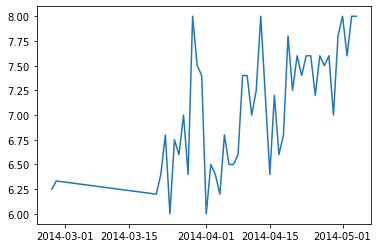

In [74]:

fig = plt.figure()
ax = plt.axes()

x = mood['date']
y = mood['value'] #[mood['variable']=='mood']
ax.plot(x, y);

In [26]:
df.to_csv("../dataset_mood_smartphone_clean.csv",index=False)

### distribution of target variable

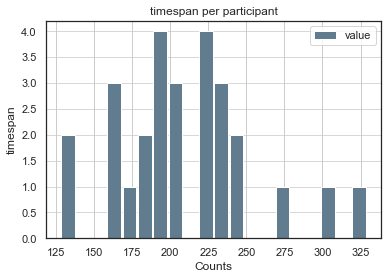

In [229]:
mood = df[df['variable']=='mood']
mood = mood[['id','value']].groupby(['id']).count()
mood.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('mood recordings per participant')
plt.xlabel('Counts')
plt.ylabel('timespan')
plt.grid(axis='y', alpha=0.75)

In [261]:
# average number of mood measurements
mood.value.mean()

208.92592592592592

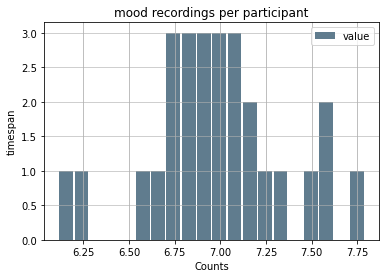

In [9]:
#distribution of mood rating

mood = df[df['variable']=='mood']
mood = mood[['id','value']].groupby(['id']).mean()
mood.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('mood recordings per participant')
plt.xlabel('Counts')
plt.ylabel('timespan')
plt.grid(axis='y', alpha=0.75)

### creating data table with unstacked variables

#### some variables can be averaged, others should be summed. Therefore, two groupbys are required

In [14]:
agg = ['mood','circumplex.arousal','circumplex.valence','activity']
df_agg = df[df['variable'].isin(agg)]
df_sum = df[~df['variable'].isin(agg)]

In [15]:
df_sum =df_sum.groupby(['id','date','hour','variable']).sum().unstack().reset_index().sort_values(['id','date','hour']).fillna(0)
df_agg =df_agg.groupby(['id','date','hour','variable']).mean().unstack().reset_index().sort_values(['id','date','hour']).fillna(0)
data = df_sum.merge(df_agg,how='outer', on=["id", "date","hour"]).fillna(0)

/Users/benplatten/.pyenv/versions/werkcollege/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [16]:
data.columns=data.columns.get_level_values(1)

In [17]:
cols = ['id', 'date', 'hour', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'screen', 'sms', 'activity', 'circumplex.arousal', 'circumplex.valence',
       'mood']
data.columns=cols

In [18]:
data.head()

,id,date,hour,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-17,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-17,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-18,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS14.01,2014-02-19,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS14.01,2014-02-19,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# checking that variable values haven't changed because of the merge
df_agg = df[df['variable'].isin(agg)]
print(df_agg['value'][df_agg['variable'] == 'activity'].sum())
print(data['activity'].sum())

2662.9862874758546
2662.986287475854


In [20]:
average_rows = data[['id','hour']].groupby(['id']).count()
average_rows.hour.mean()

991.5555555555555

In [21]:
data.describe()

,hour,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
count,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000
mean,12.195615,66.306799,120.252634,38.071942,0.763043,3.898939,4.758334,7.375352,51.775530,4.861422,1.597724,1.722056,0.191914,0.195690,271.766154,0.067160,0.099469,-0.020469,0.140856,1.470249
std,6.750556,585.641931,315.731293,287.838086,12.625473,70.030881,209.039767,69.684741,262.468208,86.099211,28.905871,24.285048,3.551193,0.682929,593.177257,0.381839,0.177818,0.481602,0.411075,2.888778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.124000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,34.766750,102.268750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,292.445250,0.000000,0.117647,0.000000,0.000000,0.000000
max,23.000000,33963.260000,9860.949000,32460.830000,1014.743000,6814.306000,32715.835000,4280.902000,30002.926000,10476.964000,2239.937000,2137.591000,344.863000,16.000000,9987.160000,10.000000,1.000000,2.000000,2.000000,10.000000


#### timespan

In [22]:
timespan = data[['id','date']].groupby('id').apply(lambda x: x.max() - x.min())       #{'date' : [np.min, np.max]})

In [25]:
timespan.describe()

,date
count,27
mean,78 days 18:40:00
std,10 days 10:30:30.262044062
min,49 days 00:00:00
25%,76 days 12:00:00
50%,77 days 00:00:00
75%,80 days 00:00:00
max,103 days 00:00:00


In [207]:
timespan.date = timespan.date.dt.days

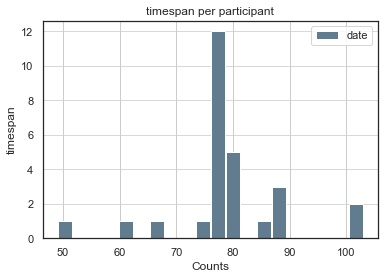

In [208]:
timespan.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('timespan per participant')
plt.xlabel('Counts')
plt.ylabel('timespan')
plt.grid(axis='y', alpha=0.75)

In [2]:
test=df[df['id']=='AS14.01']
print(test.date.max()-test.date.min())


NameError: name 'df' is not defined

In [259]:
mood_perday =  data[['id','date','mood']].groupby('id').agg({'date' : lambda x: x.max() - x.min(),
                                      'mood' : lambda x: (x != 0).sum()                   
                                      })

mood_perday['mood_per_day'] = mood_perday['mood']/ mood_perday['date'].dt.days
mood_perday['mood_per_day'].mean()

2.6871411226437174

### correlation plot

In [43]:
corr_df = data[['hour', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'screen', 'sms', 'activity', 'circumplex.arousal', 'circumplex.valence',
       'mood']]

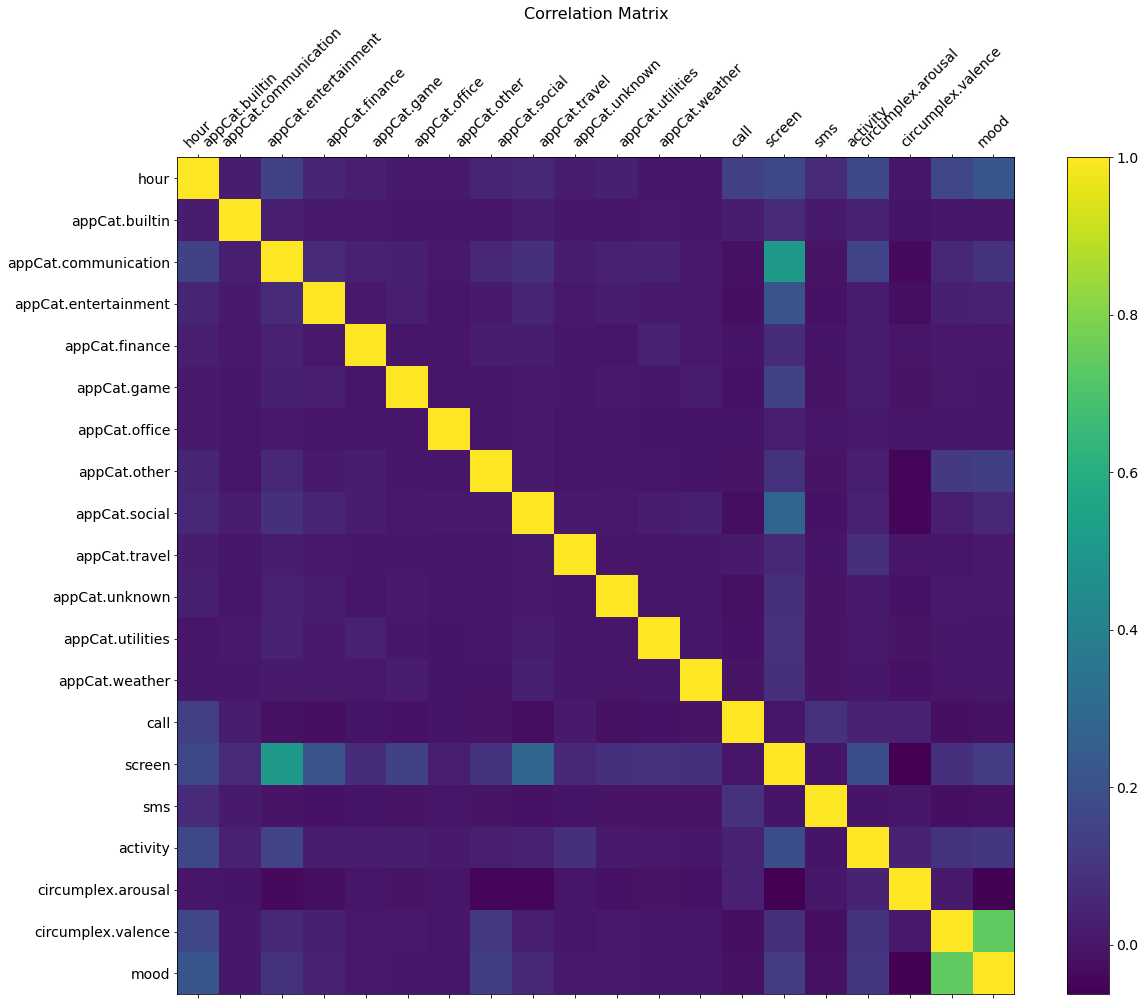

In [44]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);